In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot  as plt
import folium
from folium.plugins import MarkerCluster

AIS_path = r'.\Data'
AIS_data = []

# Iterate over files in the directory
for file_name in os.listdir(AIS_path):
    # Construct full file path
    file_path = os.path.join(AIS_path, file_name)
    
    # Check if the path is a file (not a directory)
    if os.path.isfile(file_path):
        # Open and read the file
        with open(file_path) as f:
            # Load JSON data from the file
            json_data = json.load(f)
            # Append loaded data to the list
            AIS_data.append(json_data)

# Normalize the JSON data
data_normalized = pd.json_normalize(AIS_data, 'data')

# Now you can work with your DataFrame 'data_normalized'
data_normalized.head()

,navigation.draught,navigation.time,navigation.speed,navigation.heading,navigation.location.long,navigation.location.lat,navigation.course,navigation.destination.name,navigation.destination.eta,navigation.status,device.dimensions.to_port,device.dimensions.to_bow,device.dimensions.to_stern,device.dimensions.to_starboard,device.mmsi,vessel.callsign,vessel.subtype,vessel.type,vessel.imo,vessel.name
0,3.0,2021-01-01T00:04:34+00:00,0.0,NaN,4.59392,51.68819,16.8,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
1,3.0,2021-01-01T00:10:34+00:00,0.0,NaN,4.59381,51.68838,8.7,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
2,3.0,2021-01-01T00:16:34+00:00,0.0,NaN,4.59402,51.68827,11.6,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
3,3.0,2021-01-01T00:16:34+00:00,0.0,NaN,4.59402,51.68827,11.6,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
4,3.0,2021-01-01T00:22:33+00:00,0.0,NaN,4.59388,51.68833,2.1,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER


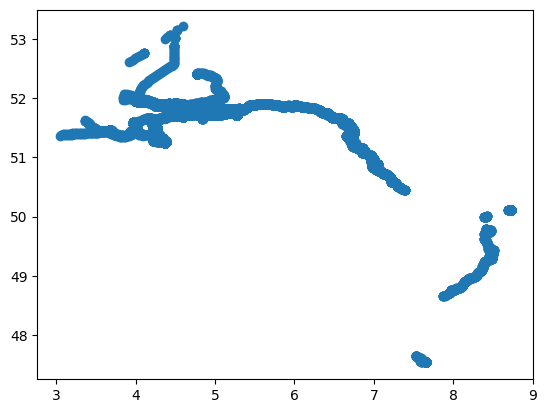

In [2]:
locations = plt.scatter(data_normalized['navigation.location.long'], data_normalized['navigation.location.lat'])

In [4]:
# Create a folium map centered at the mean latitude and longitude
map_center = [data_normalized['navigation.location.lat'].mean(), data_normalized['navigation.location.long'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

marker_cluster = MarkerCluster().add_to(m)

for index, row in data_normalized.iterrows():
    folium.Marker(location=[row['navigation.location.lat'], row['navigation.location.long']]).add_to(marker_cluster)

# scatter_html = mplleaflet.fig_to_html(plt.gcf())

# # Create a folium iframe to embed the scatterplot HTML
# scatter_frame = folium.IFrame(html=scatter_html, width=500, height=300)
# scatter_popup = folium.Popup(scatter_frame, max_width=500)

# Add the scatterplot as a popup to the folium map
# folium.Marker(location=map_center, popup=scatter_popup).add_to(m)
    
# m.save('ais_map_with_scatterplot.html')
# m
